# 1. Import Libraries & Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Remove leading/trailing spaces
df['date_added'] = df['date_added'].str.strip()

# Convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors="coerce")


# 2. Quick Dataset Overview

In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
df.head()

Shape: (8807, 12)
Columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 3. Data Cleaning

In [4]:
# Fill missing values with "Unknown"
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Unknown", inplace=True)

# 4. Movies Vs TV Shows

C:\Users\DHARMESH\AppData\Local\Temp\ipykernel_16424\1081836264.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="viridis")


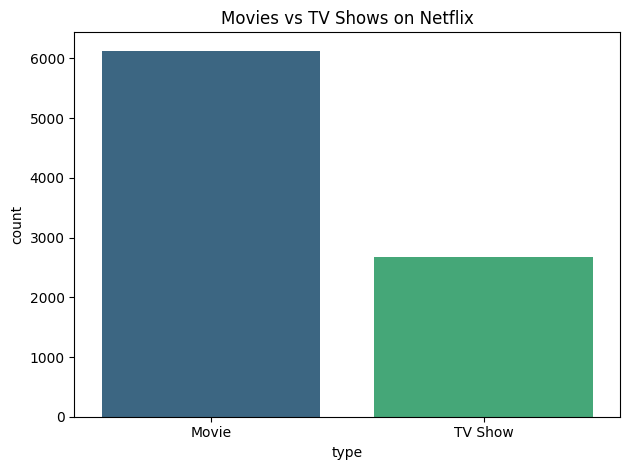

In [15]:
sns.countplot(x="type", data=df, palette="viridis")
plt.title("Movies vs TV Shows on Netflix")
plt.tight_layout()
plt.show()

# 5. Top 10 Countries

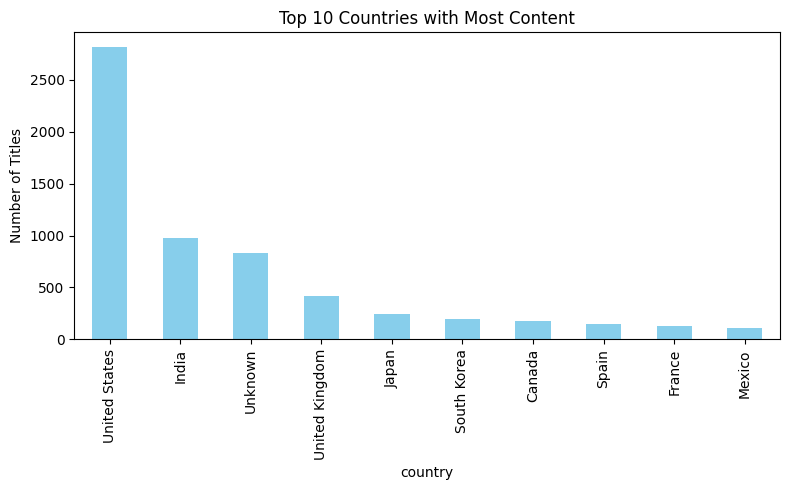

In [16]:
df['country'].value_counts().head(10).plot(kind="bar", figsize=(8,5), color="skyblue")
plt.title("Top 10 Countries with Most Content")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

# 6. Content Added Over Time

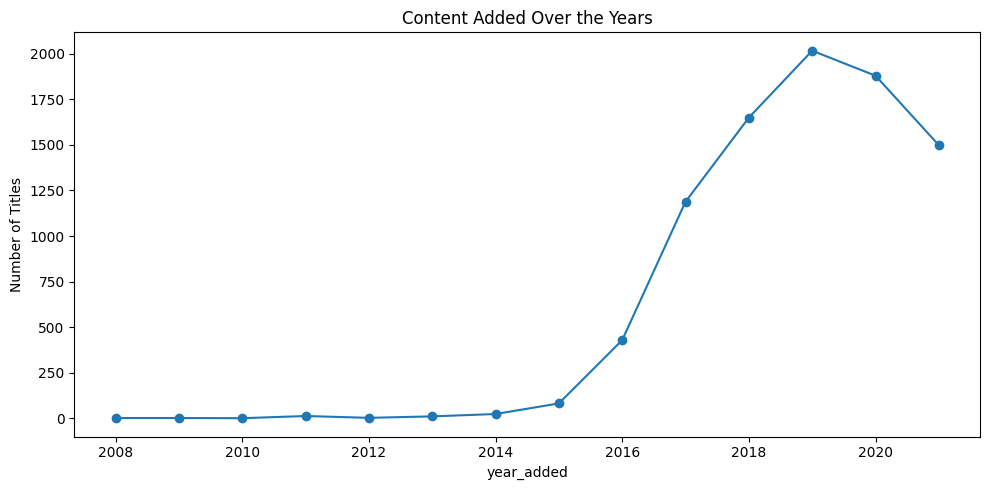

In [17]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind="line", marker="o", figsize=(10,5))
plt.title("Content Added Over the Years")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

# 7. Ratings Distribution

C:\Users\DHARMESH\AppData\Local\Temp\ipykernel_16424\3523649285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="rating", data=df, order=df['rating'].value_counts().index, palette="coolwarm")


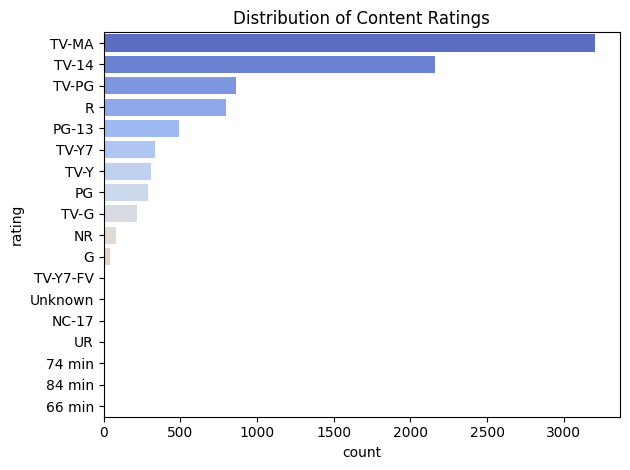

In [18]:
sns.countplot(y="rating", data=df, order=df['rating'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Content Ratings")
plt.tight_layout()
plt.show()

# 9. Most Common Genres

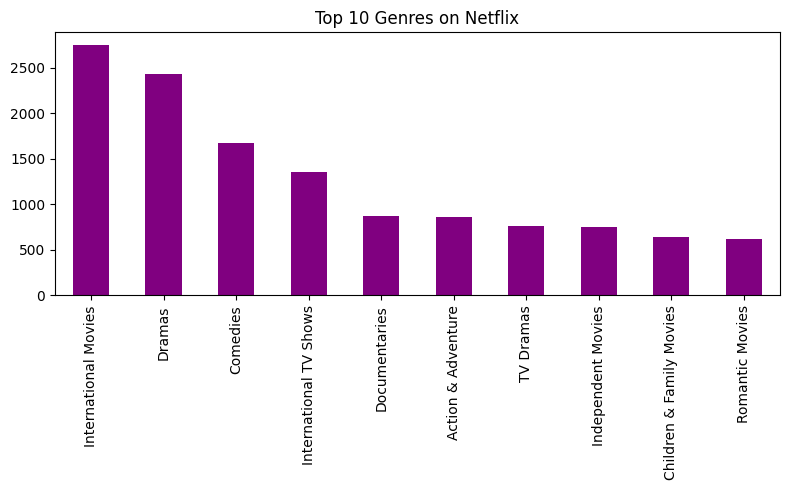

In [19]:
from collections import Counter

genres = df['listed_in'].str.split(", ")
all_genres = [g for sub in genres.dropna() for g in sub]
genre_count = pd.Series(Counter(all_genres)).sort_values(ascending=False)

genre_count.head(10).plot(kind="bar", figsize=(8,5), color="purple")
plt.title("Top 10 Genres on Netflix")
plt.tight_layout()
plt.show()

# Part B: SQL Analysis + Visualization

In [10]:
# Create SQLite connection
conn = sqlite3.connect(":memory:")

# Load dataframe into SQL
df.to_sql("netflix", conn, index=False, if_exists="replace")

8807

# 1. SQL Ouery: Movies vs Tv shows

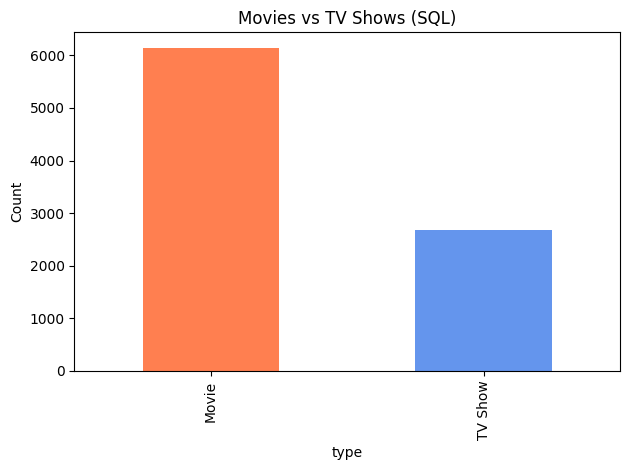

In [20]:
query = """
SELECT type, COUNT(*) as count
FROM netflix
GROUP BY type
"""
movies_tv = pd.read_sql(query, conn)

movies_tv.plot(kind="bar", x="type", y="count", legend=False, color=["#FF7F50","#6495ED"])
plt.title("Movies vs TV Shows (SQL)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. SQL Query: Top 10 Countries

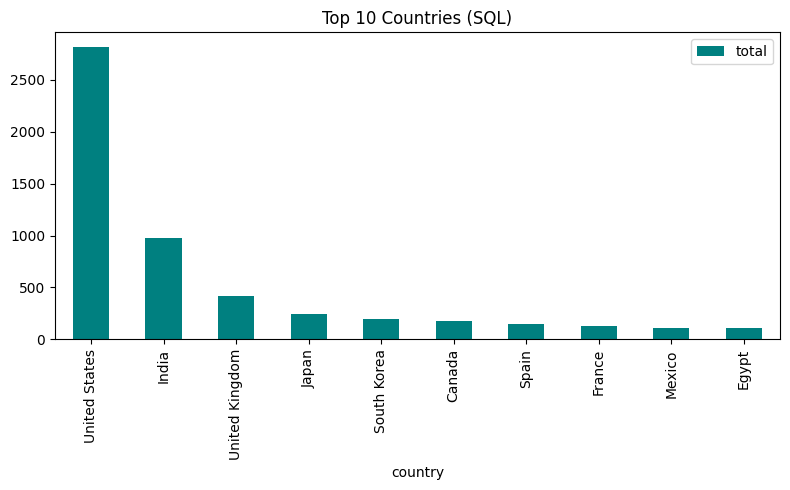

In [21]:
query = """
SELECT country, COUNT(*) as total
FROM netflix
WHERE country != 'Unknown'
GROUP BY country
ORDER BY total DESC
LIMIT 10
"""
top_countries = pd.read_sql(query, conn)

top_countries.plot(kind="bar", x="country", y="total", figsize=(8,5), color="teal")
plt.title("Top 10 Countries (SQL)")
plt.tight_layout()
plt.show()

# 3. SQL Query: Content Added Over time

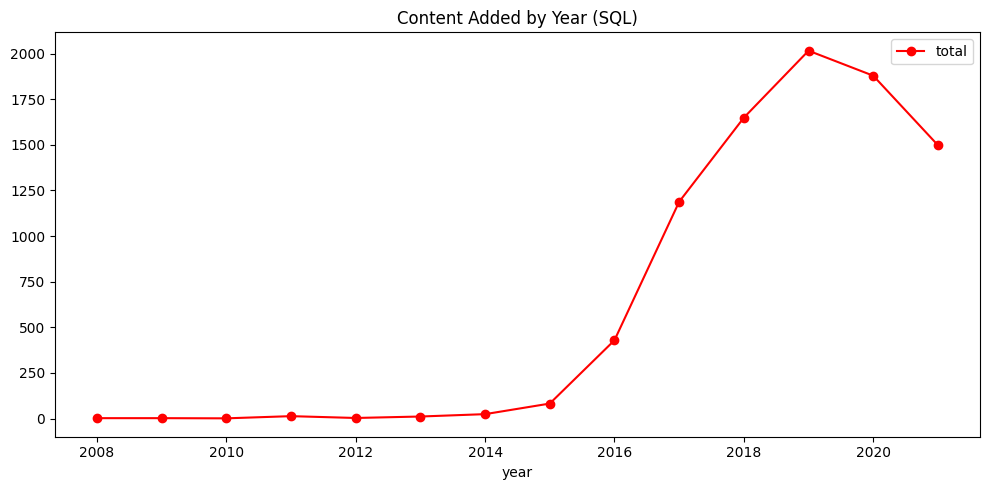

In [22]:
query = """
SELECT strftime('%Y', date_added) as year, COUNT(*) as total
FROM netflix
WHERE date_added IS NOT NULL
GROUP BY year
ORDER BY year
"""
yearly_content = pd.read_sql(query, conn)

yearly_content.plot(x="year", y="total", kind="line", marker="o", figsize=(10,5), color="red")
plt.title("Content Added by Year (SQL)")
plt.tight_layout()
plt.show()

# 4. SQL Query: Rating Distribution

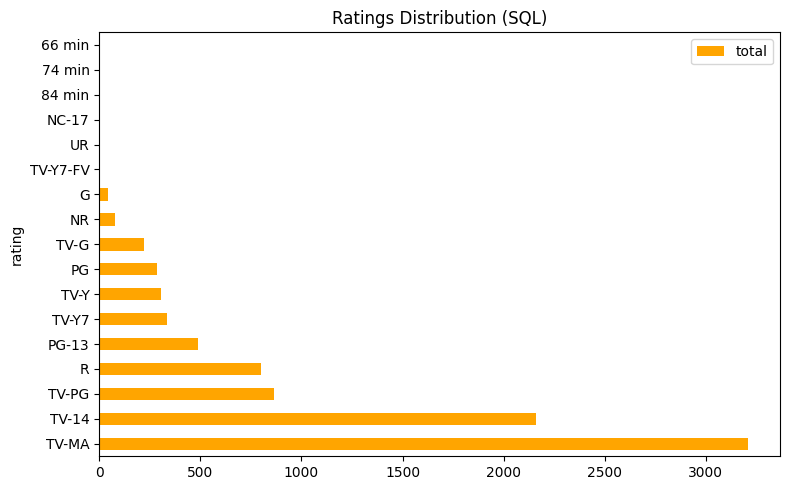

In [23]:
query = """
SELECT rating, COUNT(*) as total
FROM netflix
WHERE rating != 'Unknown'
GROUP BY rating
ORDER BY total DESC
"""
ratings = pd.read_sql(query, conn)

ratings.plot(kind="barh", x="rating", y="total", figsize=(8,5), color="orange")
plt.title("Ratings Distribution (SQL)")
plt.tight_layout()
plt.show()